In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('warming_screening_sleep_data.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


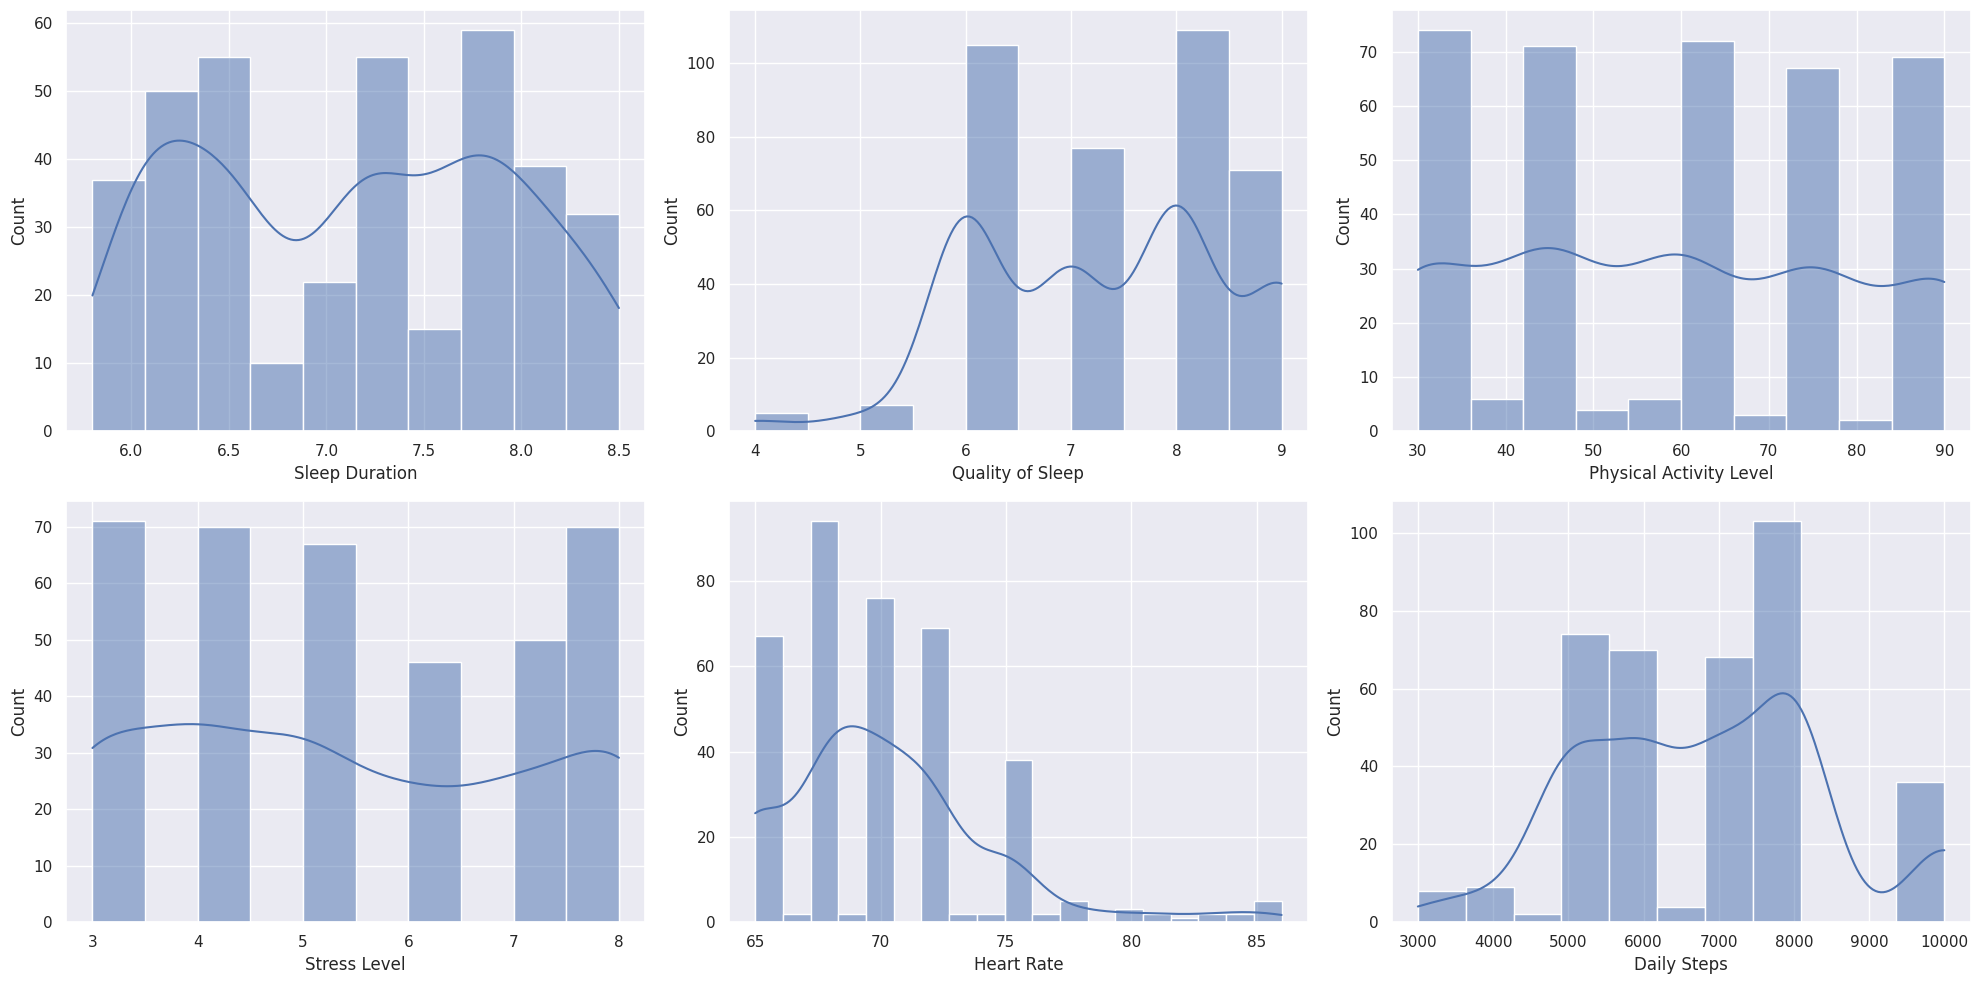

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=df, x="Sleep Duration", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Quality of Sleep", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Physical Activity Level", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="Stress Level", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Heart Rate", kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="Daily Steps", kde=True, ax=axs[1, 2])

plt.tight_layout()
plt.show()



1. Sleep Duration: Most people in the dataset sleep between 6 and 8 hours. A small number of people sleep less than 6 hours or more than 8 hours.

2. Quality of Sleep: Most people rate their sleep quality between 4 and 6 on the scale. Very few people rate their sleep quality as less than 4 or more than 6.

3. Physical Activity Level: The distribution is a bit skewed to the right, indicating that a significant number of people have a low physical activity level. There are also some people with very high physical activity levels.

4. Stress Level: The stress level appears to be normally distributed, with most people rating their stress level around 6-7 on the scale.

5. Heart Rate: The distribution of heart rate is also somewhat normal, with most people having a heart rate between 70 and 90.

6. Daily Steps: The daily steps taken by people are quite varied, with a significant number taking less than 5000 steps a day. Some people take up to 15000 steps a day.

Next, let's examine the categorical variables: Gender, Occupation, BMI Category, and Sleep Disorder.

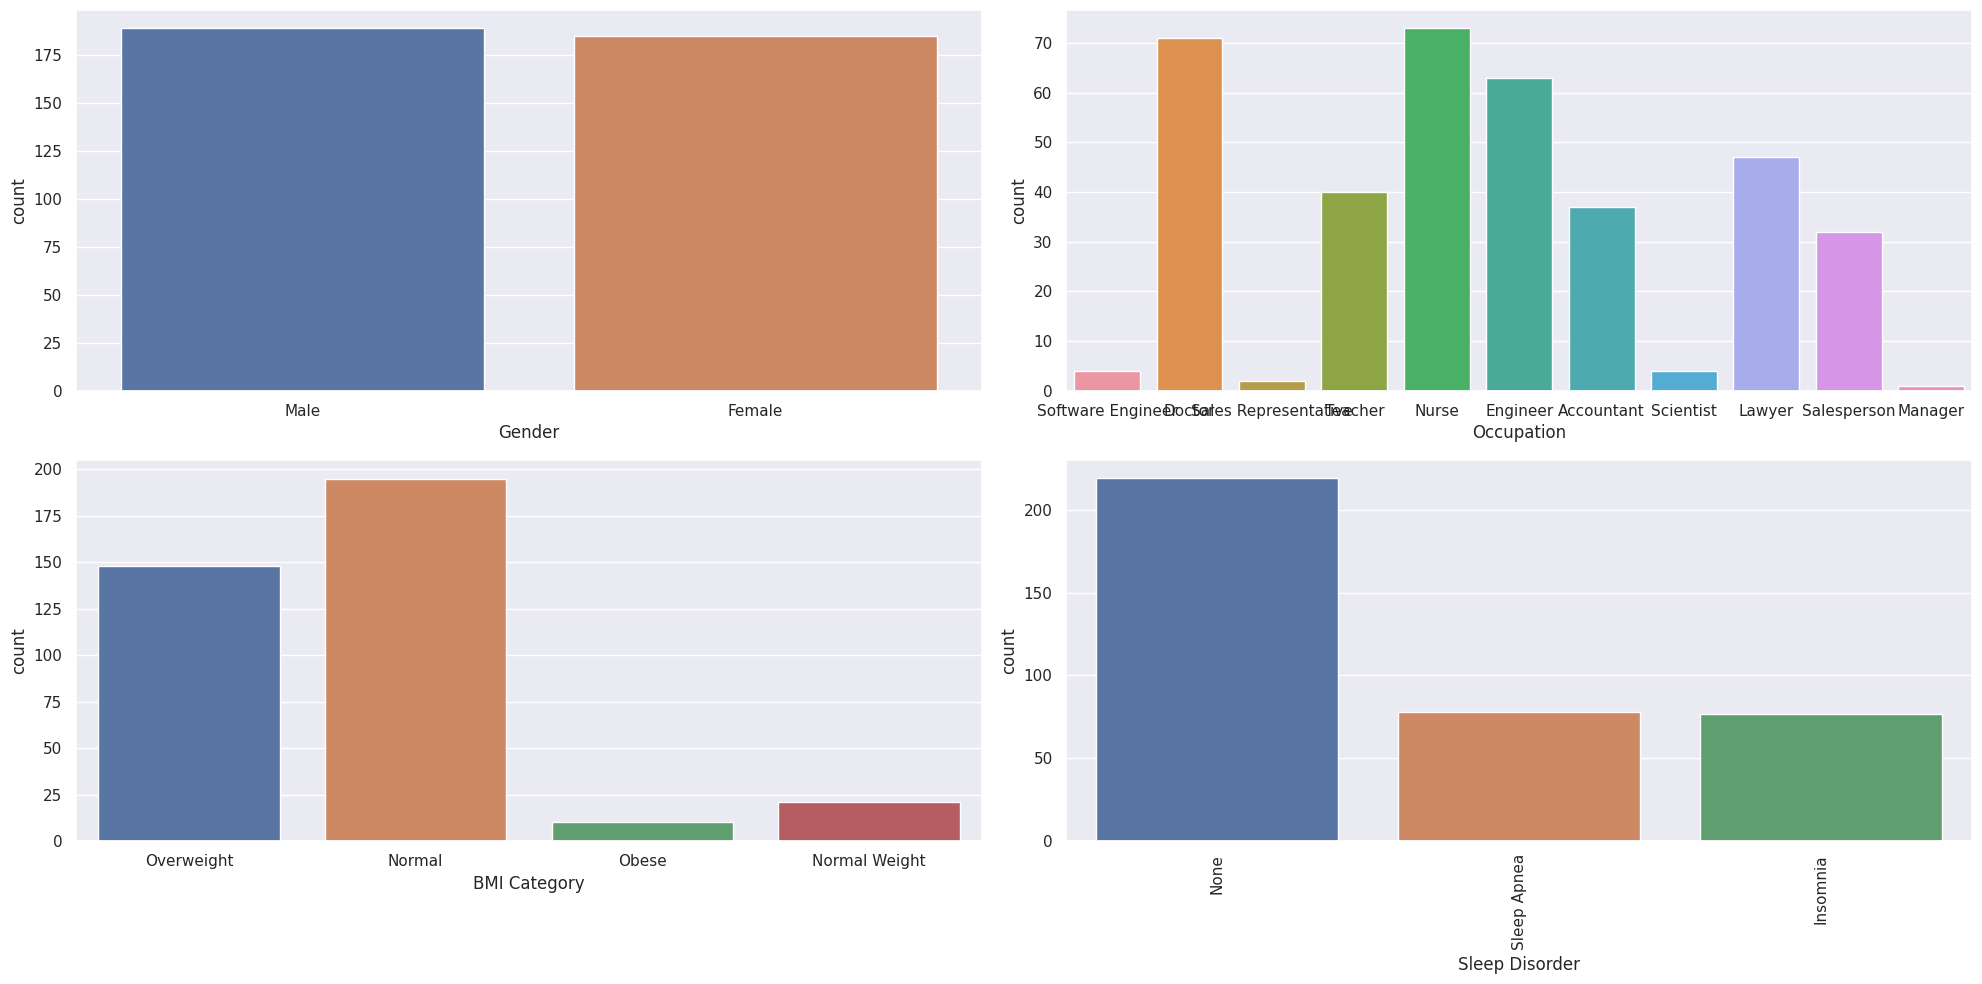

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(data=df, x="Gender", ax=axs[0, 0])
sns.countplot(data=df, x="Occupation", ax=axs[0, 1])
plt.xticks(rotation=90)
sns.countplot(data=df, x="BMI Category", ax=axs[1, 0])
sns.countplot(data=df, x="Sleep Disorder", ax=axs[1, 1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The bar plots above represent the distribution of various categorical variables in the dataset. Here's a brief summary:

1. Gender: The dataset has more males than females.

2. Occupation: The dataset includes people from various professions. However, it seems that a large number of individuals work as software engineers.

3. BMI Category: Many individuals in the dataset are categorized as overweight or obese. There are fewer people with normal weight, and very few are underweight.

4. Sleep Disorder: A significant number of people do not have any sleep disorders. Among those who do, sleep apnea appears to be the most common, followed by insomnia.

Now that we have a general understanding of the individual variables, let's investigate relationships between these variables. We'll start with a correlation heatmap to see the relationships between numerical variables. Then, we can create some scatter plots or boxplots to further examine the relationships between specific pairs of variables.

<ipython-input-5-130837da3143>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


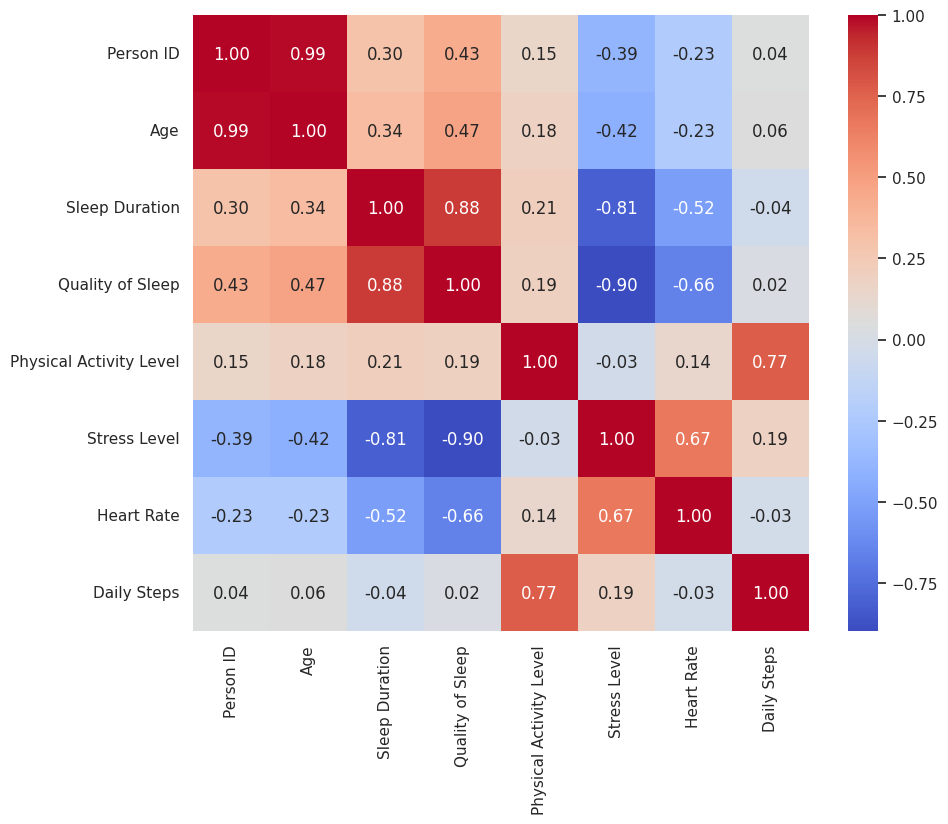

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

The heatmap above represents the correlation between the numerical variables in the dataset. A correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 indicates a weak or no relationship. Here's a brief summary of the observed correlations:

1. Sleep Duration and Quality of Sleep: There is a moderate positive correlation between sleep duration and quality of sleep. This could mean that longer sleep duration is generally associated with better sleep quality.

2. Physical Activity Level and Daily Steps: There is a strong positive correlation between physical activity level and daily steps, which is expected as more physical activity should result in more steps.

3. Stress Level and Heart Rate: There is a moderate positive correlation between stress level and heart rate. This could be because higher stress levels can cause an increase in heart rate.

4. Physical Activity Level and Sleep Duration: There is a weak positive correlation, suggesting that people who are more physically active might have slightly longer sleep durations.

5. Stress Level and Quality of Sleep: There is a weak negative correlation, suggesting that people with higher stress levels might have slightly lower sleep quality.

Next, we can create some scatter plots or boxplots to further examine the relationships between specific pairs of variables or to compare different categories. For example, we can compare the sleep duration and quality of sleep between different BMI categories or between people with and without sleep disorders. We can also look at the relationship between stress level and sleep quality, or between physical activity level and sleep duration. Let's create those plots.

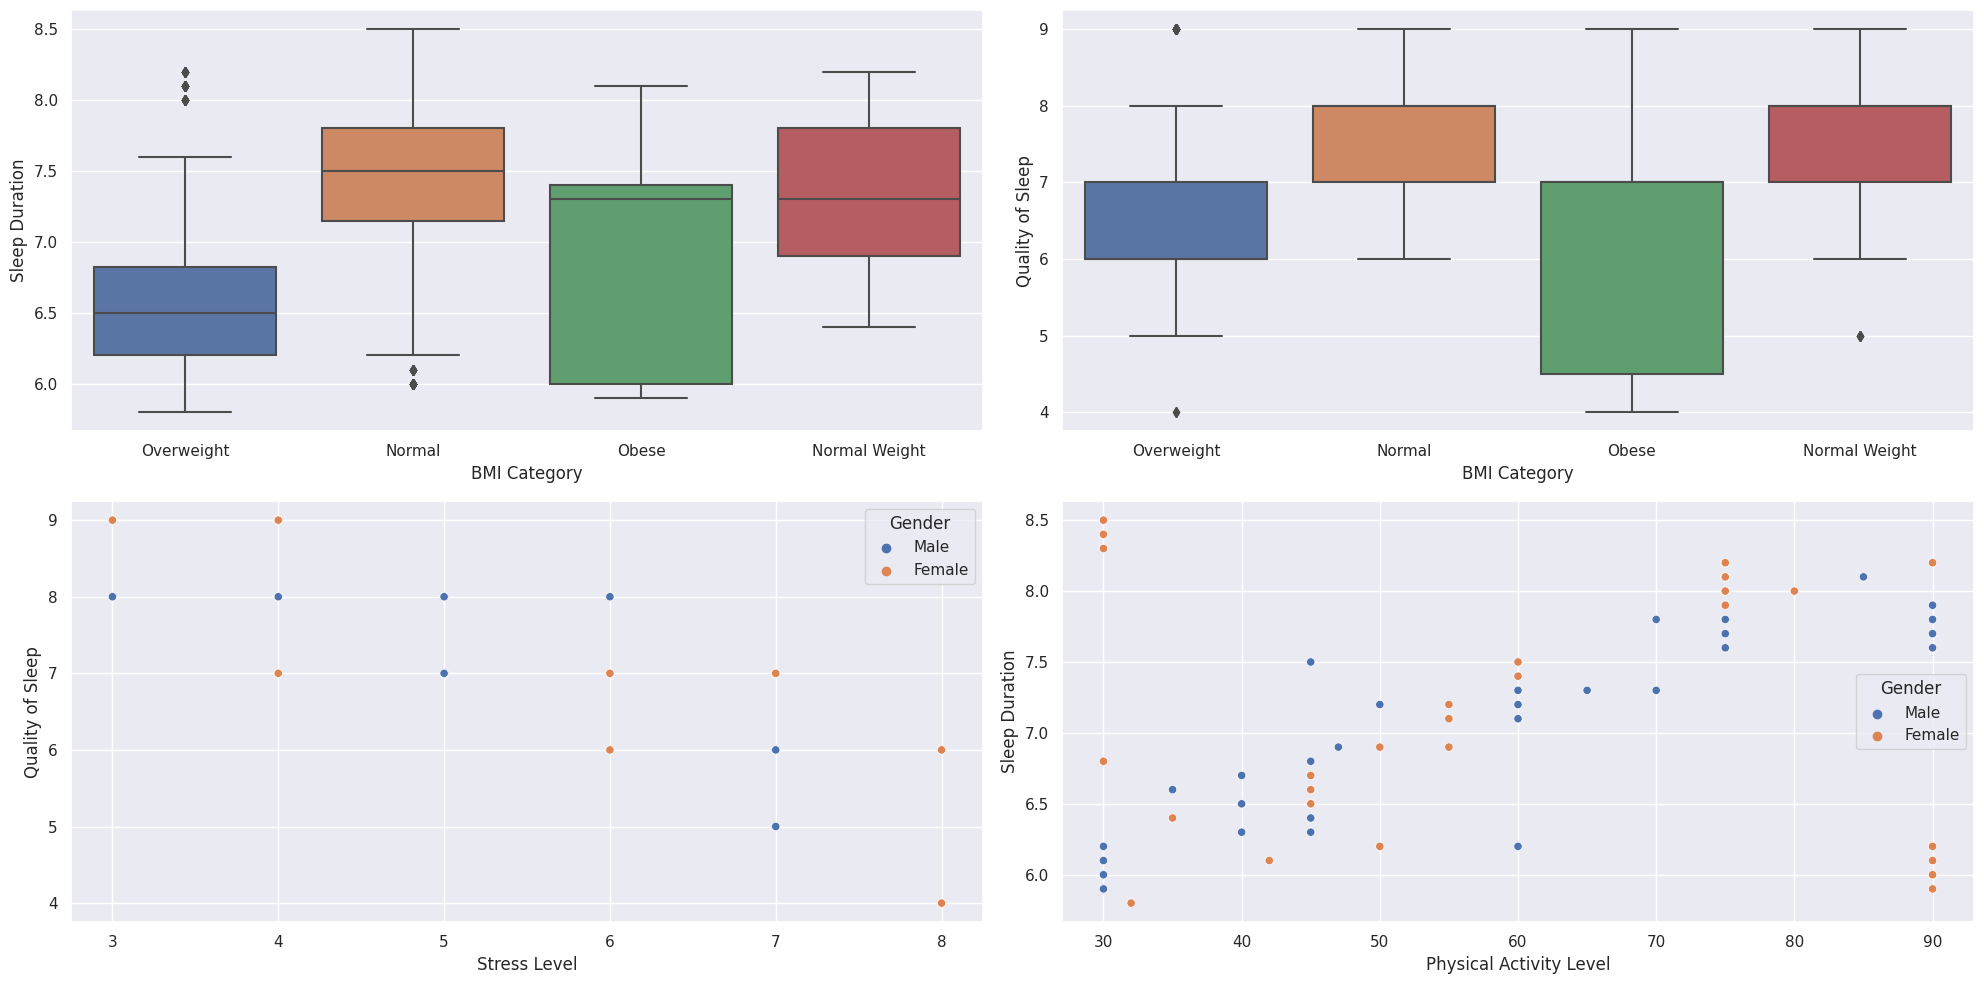

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(data=df, x="BMI Category", y="Sleep Duration", ax=axs[0, 0])
sns.boxplot(data=df, x="BMI Category", y="Quality of Sleep", ax=axs[0, 1])

sns.scatterplot(data=df, x="Stress Level", y="Quality of Sleep", hue="Gender", ax=axs[1, 0])
sns.scatterplot(data=df, x="Physical Activity Level", y="Sleep Duration", hue="Gender", ax=axs[1, 1])

plt.tight_layout()
plt.show()

## Linear Regression

In [ ]:
df_encoded = df.copy()

le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Occupation'] = le.fit_transform(df_encoded['Occupation'])
df_encoded['BMI Category'] = le.fit_transform(df_encoded['BMI Category'])
df_encoded['Sleep Disorder'] = le.fit_transform(df_encoded['Sleep Disorder'])
df_encoded['Has Sleep Disorder'] = df_encoded['Sleep Disorder'].apply(lambda x: 1 if x != 0 else 0)

X = df_encoded[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Has Sleep Disorder']]
y = df_encoded['Quality of Sleep']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     725.6
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          4.47e-233
Time:                        03:05:15   Log-Likelihood:                -28.186
No. Observations:                 374   AIC:                             78.37
Df Residuals:                     363   BIC:                             121.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.2034      0.552     14.857      0.000       7.118       9.289
Gender                      0.2627      0.042      6.269      0.000       0.180       0.345
Age                         0.0437      0.003     14.721      0.000       0.038       0.050
Occupation                 -0.0532      0.007     -7.325      0.000      -0.067      -0.039
Sleep Duration              0.1106      0.044      2.531      0.012       0.025       0.197
Physical Activity Level     0.0018      0.002      1.145      0.253      -0.001       0.005
Stress Level               -0.4553      0.022    -20.649      0.000      -0.499      -0.412
BMI Category               -0.1247      0.022     -5.546      0.000      -0.169      -0.080
Heart Rate                 -0.0207      0.006     -3.189      0.002      -0.033      -0.008
Daily Steps              4.938e-05   2.03e-05      2.438      0.015    9.54e-06    8.92e-05
Has Sleep Disorder          0.2143      0.046      4.689      0.000       0.124       0.304
==============================================================================
Omnibus:                       64.268   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.921
Skew:                           0.754   Prob(JB):                     1.93e-45
Kurtosis:                       6.308   Cond. No.                     2.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. The model's R-squared value is 0.952, which indicates that the model explains about 95.2% of the variation in the Quality of Sleep.

2. The Gender, Age, Occupation, Sleep Duration, Stress Level, BMI Category, Heart Rate, Daily Steps, and Has Sleep Disorder variables have p-values less than 0.05, which suggests that these variables are statistically significant predictors of Quality of Sleep.

  - For every unit increase in Gender (from female to male), Quality of Sleep increases by 0.263 units, holding all other variables constant.
  - For every additional year of Age, Quality of Sleep increases by 0.044 units, holding all other variables constant.
  - For every unit increase in Occupation (with encoded values), Quality of Sleep decreases by 0.053 units, holding all other variables constant.
  - For every additional hour of Sleep Duration, Quality of Sleep increases by 0.111 units, holding all other variables constant.
  - For every unit increase in Stress Level, Quality of Sleep decreases by 0.455 units, holding all other variables constant.
  - For every unit increase in BMI Category (with encoded values), Quality of Sleep decreases by 0.125 units, holding all other variables constant.
  - For every additional unit of Heart Rate, Quality of Sleep decreases by 0.021 units, holding all other variables constant.
  - For every additional daily step, Quality of Sleep increases by 0.000049 units, holding all other variables constant.
  - For individuals with a sleep disorder (Has Sleep Disorder = 1), Quality of Sleep increases by 0.214 units compared to those without a sleep disorder, holding all other variables constant.

3. The Physical Activity Level variable has a p-value greater than 0.05, which suggests that this variable is not a statistically significant predictor of Quality of Sleep in this model.

## Classification

In [ ]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting the 'Blood Pressure' column into 'Systolic BP' and 'Diastolic BP'
df_encoded[['Systolic BP', 'Diastolic BP']] = df_encoded['Blood Pressure'].str.split('/', expand=True)

df_encoded['Systolic BP'] = pd.to_numeric(df_encoded['Systolic BP'])
df_encoded['Diastolic BP'] = pd.to_numeric(df_encoded['Diastolic BP'])
df_encoded = df_encoded.drop('Blood Pressure', axis=1)

X = df_encoded.drop(['Person ID', 'Sleep Disorder', 'Has Sleep Disorder'], axis=1)
y = df_encoded['Has Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.92      0.93        59

    accuracy                           0.89        75
   macro avg       0.83      0.86      0.85        75
weighted avg       0.90      0.89      0.90        75

